In [ ]:
# make dataset
num_bot = 5
x_bot = 2*np.random.rand(num_bot)-1
x_bot = np.sort(x_bot)
x_bot.shape = (len(x_bot),1)
y_bot = -np.ones((len(x_bot),1))

num_top = 0
x_top = 4*np.random.rand(num_top) + 1
x_top = x_top.tolist()
x_top.append(4)
x_top.append(4.3)
x_top.append(4.5)
x_top.append(4.7)

x_top.append(1.1)
x_top.append(1.4)
x_top = np.asarray(x_top)
x_top = np.sort(x_top)
x_top.shape = (len(x_top),1)
y_top = np.ones((len(x_top),1))


x = np.concatenate((x_bot,x_top),axis = 0)
y = np.concatenate((y_bot,y_top),axis = 0)

data = np.concatenate((x,y),axis=1)

# regression / histogram plot

In [1]:
# imports from custom library
import sys
sys.path.append('../../')
import matplotlib.pyplot as plt
from mlrefined_libraries import superlearn_library as superlearn
from mlrefined_libraries import math_optimization_library as optlib
import autograd.numpy as np
import math
import pandas as pd
%matplotlib notebook

# this is needed to compensate for %matplotlib notebook's tendancy to blow up images when plotted inline
from matplotlib import rcParams
rcParams['figure.autolayout'] = True

%load_ext autoreload
%autoreload 2

## Simulated dataset

In [92]:
num_pts = 300
x = np.random.rand(num_pts)
y = 0.5*x + 0.05*np.random.randn(num_pts)
x.shape = (len(x),1)
y.shape = (len(y),1)
data = np.concatenate((x,y),axis = 1)

<IPython.core.display.Javascript object>


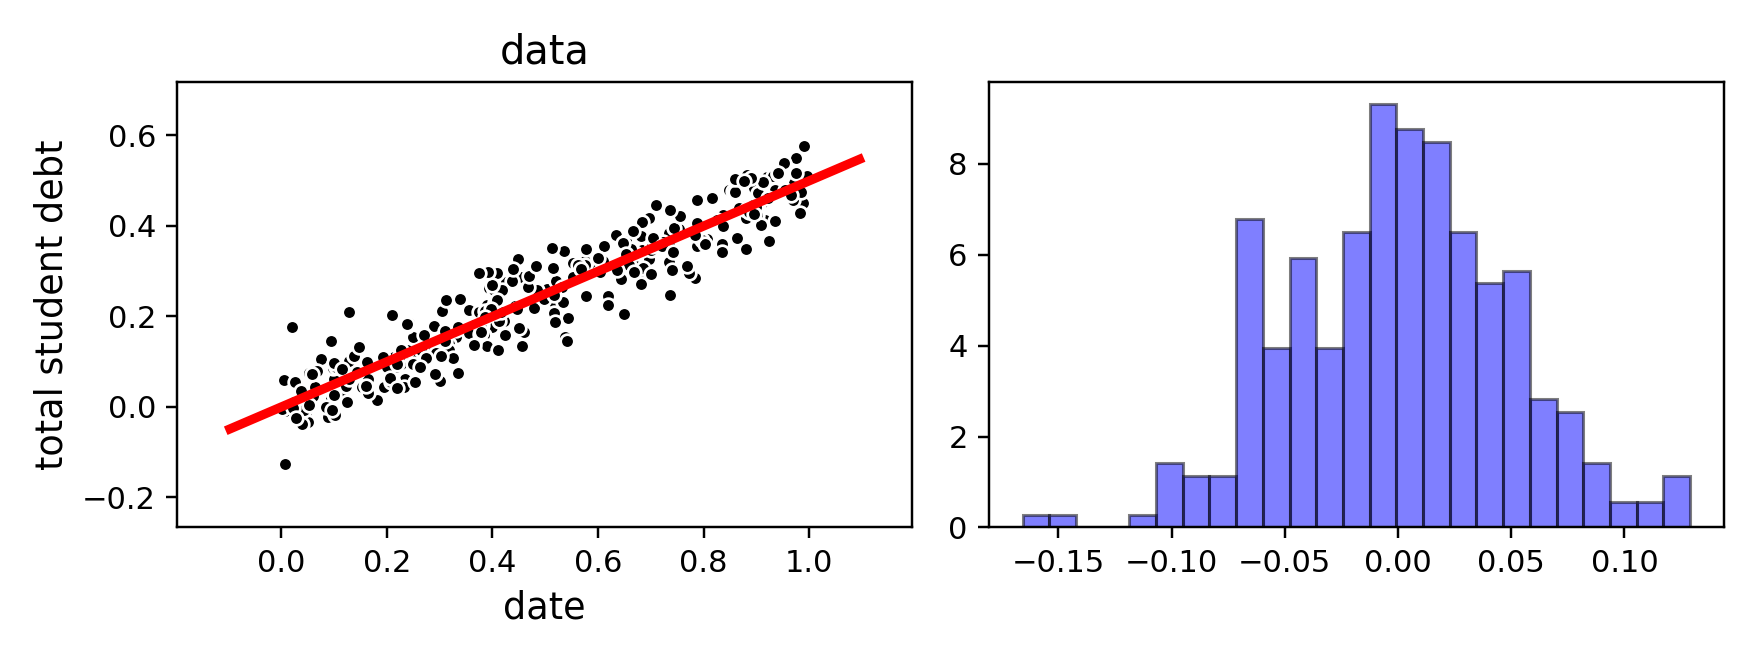

In [93]:
# load in data to probability regression demos
demo1 = superlearn.regression_probabilistic_demos.visualizer(data)

# solve 
demo1.run_algo(algo = 'newtons_method',w_init = np.random.randn(2,1), max_its = 1)

# run
demo1.error_hist(num_bins = 25,xlabel = 'date',ylabel = 'total student debt')

## Student debt dataset

<IPython.core.display.Javascript object>


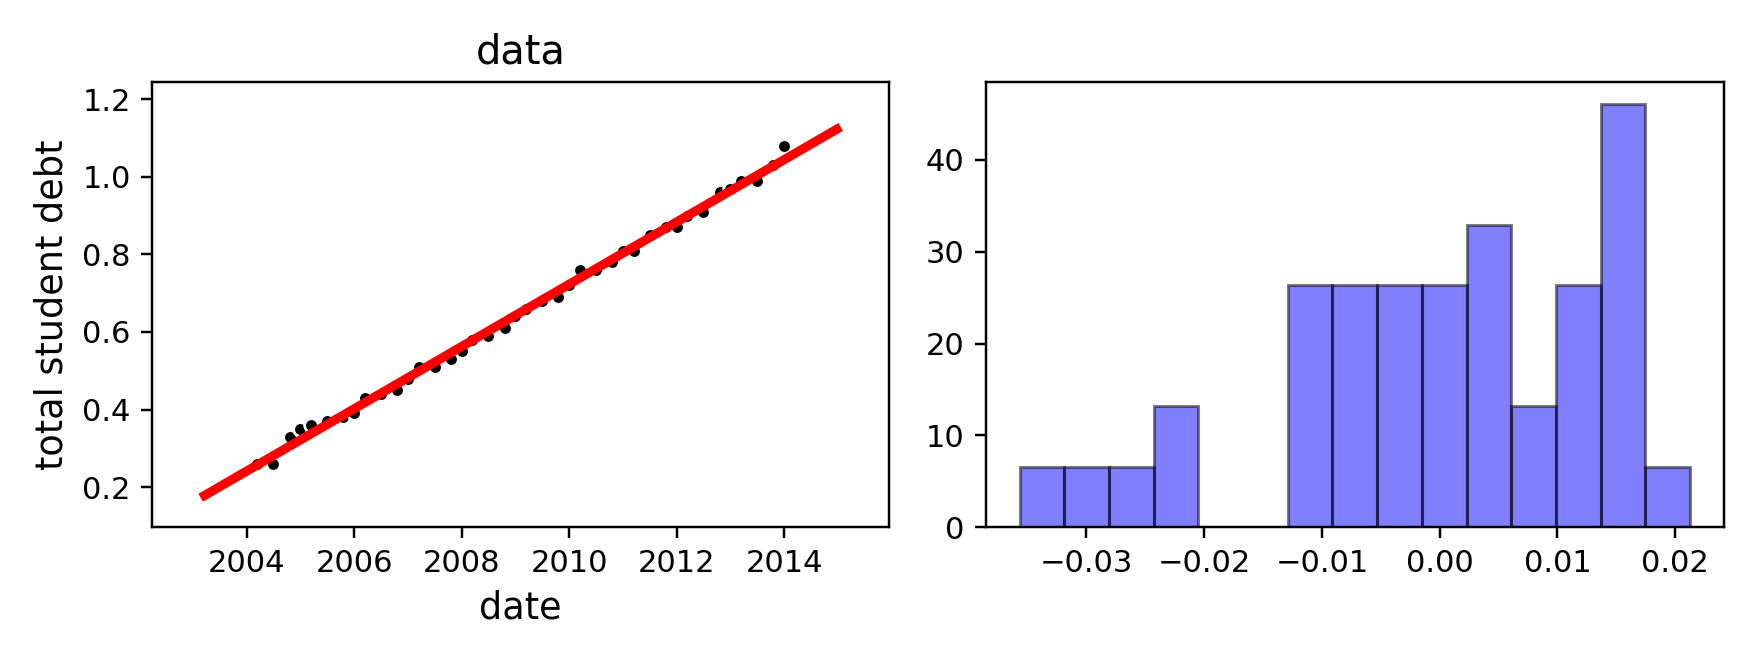

In [81]:
# load in dataset
datapath = '../../mlrefined_datasets/superlearn_datasets/student_debt.csv'
data = np.asarray(pd.read_csv(datapath,header = None))

# load in data to probability regression demos
demo2 = superlearn.regression_probabilistic_demos.visualizer(data)

# solve 
demo2.run_algo(algo = 'newtons_method',w_init = np.random.randn(2,1), max_its = 1)

# run
demo2.error_hist(num_bins = 15,xlabel = 'date',ylabel = 'total student debt')

## Climate change dataset

<IPython.core.display.Javascript object>


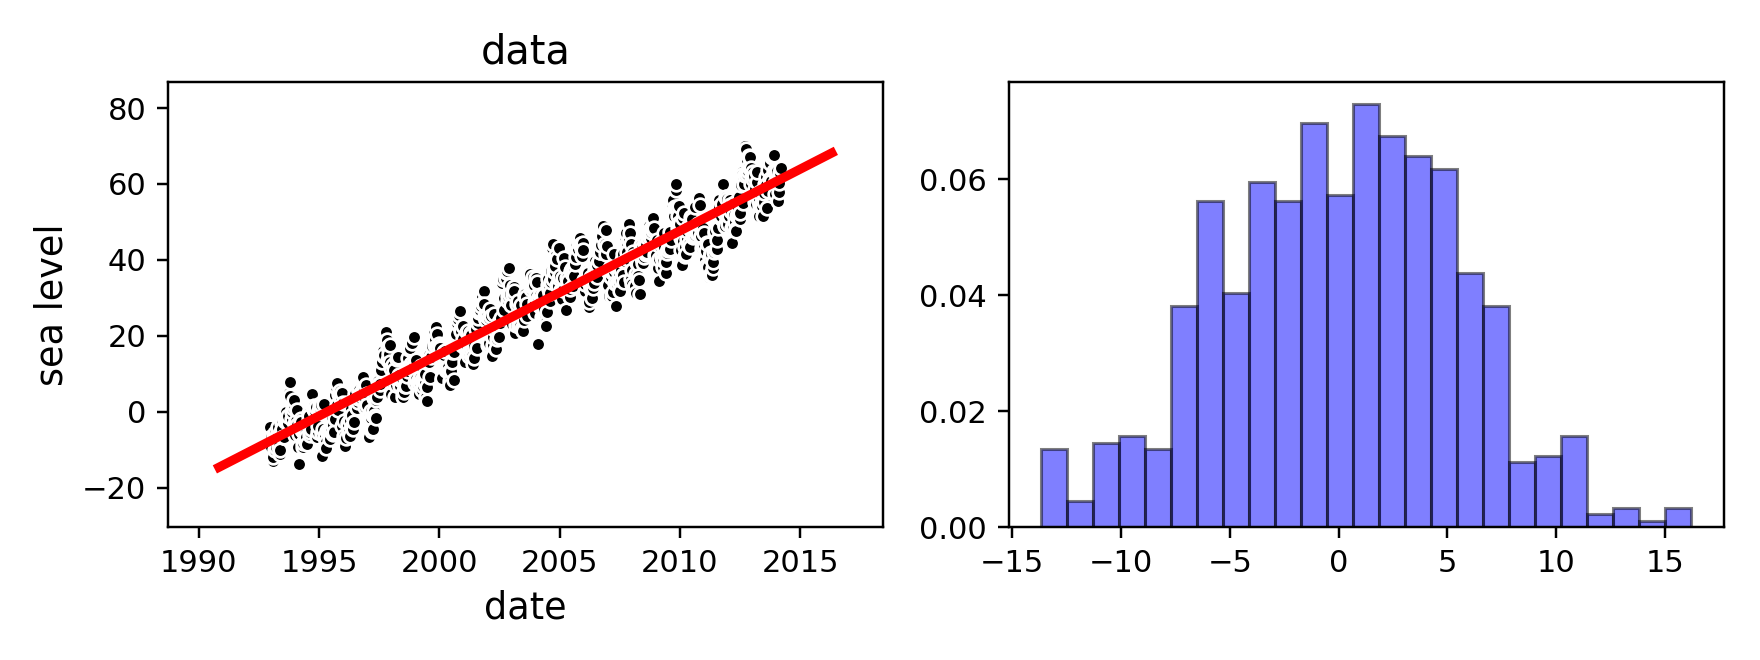

In [95]:
# load in dataset
datapath = '../../mlrefined_datasets/superlearn_datasets/climate_data.csv'
data = np.asarray(pd.read_csv(datapath,header = None))

# load in data to probability regression demos
demo3 = superlearn.regression_probabilistic_demos.visualizer(data)

# solve 
demo3.run_algo(algo = 'newtons_method',w_init = np.random.randn(2,1), max_its = 1)

# run
demo3.error_hist(num_bins = 25,xlabel = 'date',ylabel = 'sea level')

## Mother-daughter height dataset

<IPython.core.display.Javascript object>


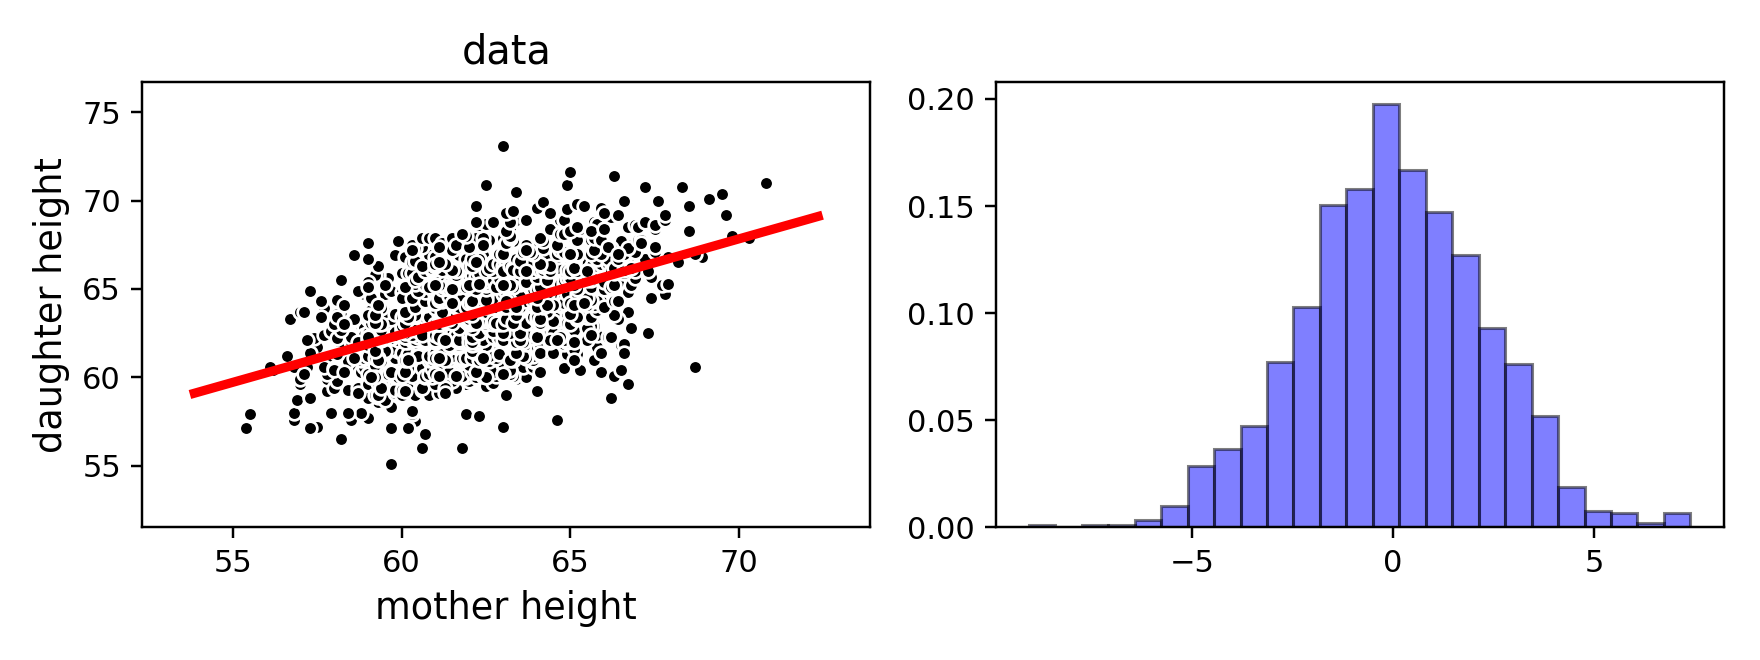

In [97]:
# load in dataset - taken from https://www.statcrunch.com/5.0/shareddata.php?keywords=regression
datapath = '../../mlrefined_datasets/superlearn_datasets/mother_daughter.csv'
data = np.asarray(pd.read_csv(datapath,header = None))

# load in data to probability regression demos
demo4 = superlearn.regression_probabilistic_demos.visualizer(data)

# solve 
demo4.run_algo(algo = 'newtons_method',w_init = np.random.randn(2,1), max_its = 1)

# run
demo4.error_hist(num_bins = 25,xlabel = 'mother height',ylabel = 'daughter height')

## Movie budget vs domestic gross

<IPython.core.display.Javascript object>


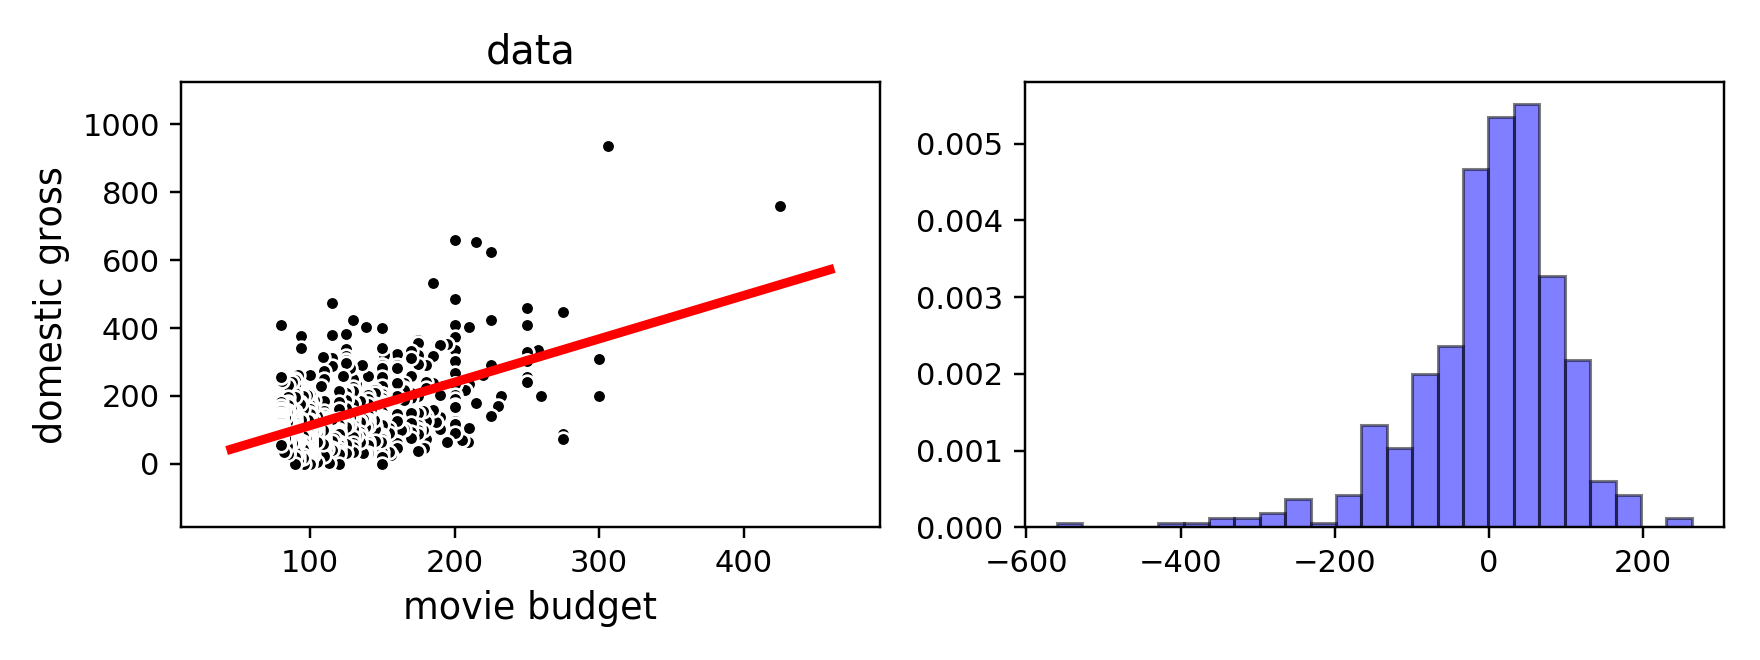

In [98]:
# load in dataset - taken from https://www.statcrunch.com/5.0/shareddata.php?keywords=regression
datapath = '../../mlrefined_datasets/superlearn_datasets/movie_budget_domestic.csv'
data = np.asarray(pd.read_csv(datapath,header = None))[:500,:]

# load in data to probability regression demos
demo5 = superlearn.regression_probabilistic_demos.visualizer(data)

# solve 
demo5.run_algo(algo = 'newtons_method',w_init = np.random.randn(2,1), max_its = 1)

# run
demo5.error_hist(num_bins = 25,xlabel = 'movie budget',ylabel = 'domestic gross')

## Body temperature

<IPython.core.display.Javascript object>


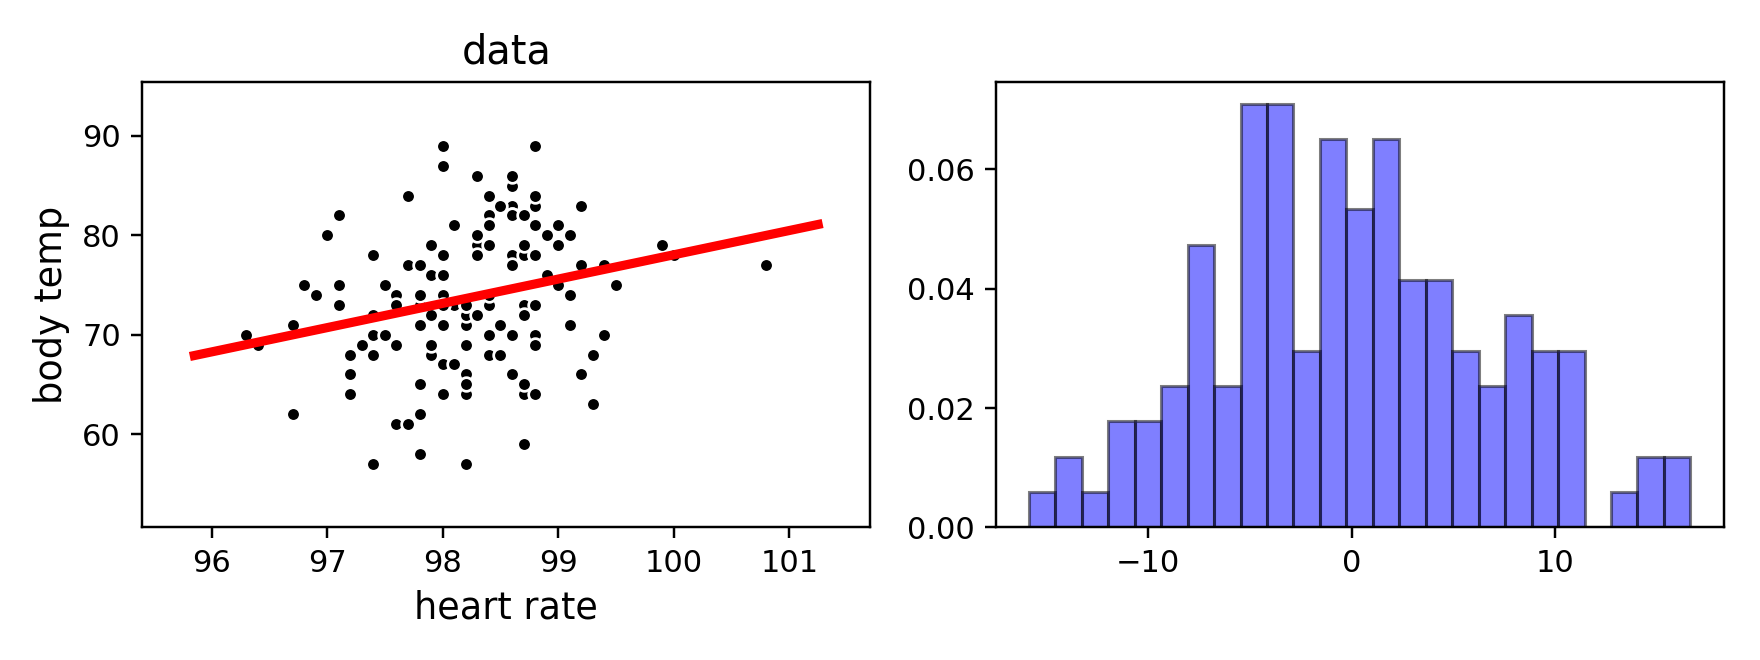

In [99]:
# load in dataset - taken from https://www.statcrunch.com/5.0/shareddata.php?keywords=regression
datapath = '../../mlrefined_datasets/superlearn_datasets/body_temp.csv'
data = np.asarray(pd.read_csv(datapath,header = None))[:500,:]

# load in data to probability regression demos
demo6 = superlearn.regression_probabilistic_demos.visualizer(data)

# solve 
demo6.run_algo(algo = 'newtons_method',w_init = np.random.randn(2,1), max_its = 1)

# run
demo6.error_hist(num_bins = 25,xlabel = 'heart rate',ylabel = 'body temp')

# Translate .mat to csv

In [15]:
import scipy.io as converter

In [17]:
original_data = converter.loadmat('climate.mat')

In [21]:
x = original_data['a']

In [23]:
y = original_data['b']

In [26]:
new_data = np.concatenate((x,y),axis = 1)

In [30]:
np.savetxt('climate_data.csv',new_data,delimiter = ',')

# translate no delimieter to ','

In [70]:
body = np.loadtxt('body_temp.csv',delimiter = ',')

In [53]:
np.savetxt('body_temp.csv',body,delimiter = ',')

## conversion to classification

In [58]:
labels = np.ones((len(body)))
labels.shape = (len(labels),1)

In [59]:
labels[:65] = -1

In [64]:
body = np.concatenate((body,labels),axis = 1)

In [65]:
np.savetxt('body_temp_class.csv',body,delimiter = ',')

In [67]:
ind = np.argwhere(labels == -1)

<IPython.core.display.Javascript object>


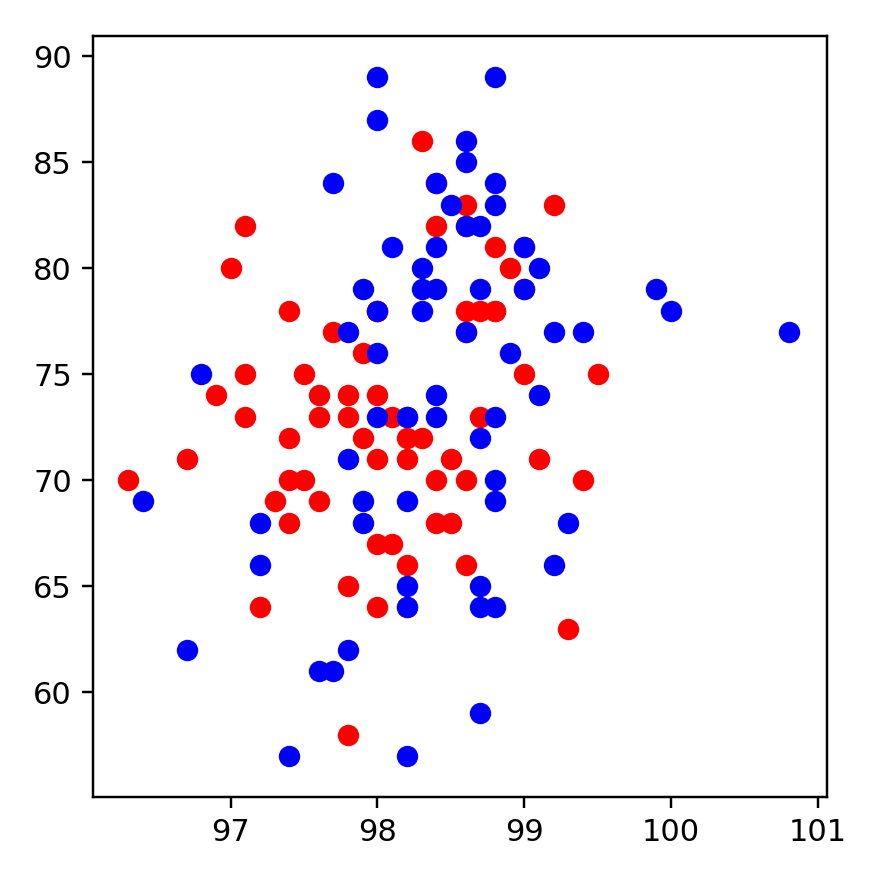

In [74]:
from matplotlib import gridspec


fig, axs = plt.subplots(1, 1, figsize=(4,4))
gs = gridspec.GridSpec(1, 1) 
ax = plt.subplot(gs[0]); 
    
    
ax.scatter(body[:65,0],body[:65,1],color = 'r')
ax.scatter(body[65:,0],body[65:,1],color = 'b')
plt.show()